In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

import torch.backends
from torch.nn import Module, Linear, ReLU
from torch.optim import SGD
from torch.nn import MSELoss

In [ ]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.backends.cudnn.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print("Using device:", device)

Using device: cuda


(array([ 22., 114., 184., 134.,  43.,  37., 148., 214.,  86.,  18.]),
 array([-0.5302251 , -0.423934  , -0.31764289, -0.21135178, -0.10506067,
         0.00123044,  0.10752154,  0.21381265,  0.32010376,  0.42639487,
         0.53268598]),
 <BarContainer object of 10 artists>)

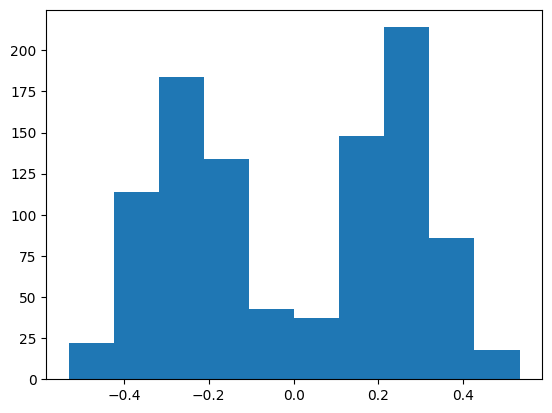

In [ ]:
N=500
mu, sigma = -0.25, 0.1
mu2, sigma2 = 0.25, 0.1
X1 = np.random.normal(mu, sigma, N)
X2 = np.random.normal(mu2, sigma2, N)
eps_b = np.concatenate([X1, X2])
plt.hist(eps_b)

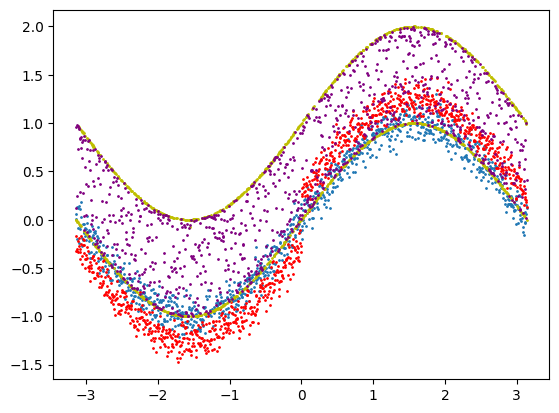

In [ ]:
# Generate Data
f = np.sin

x = np.linspace(- np.pi, np.pi, 1000)
eps = np.random.normal(0, 0.1, 1000)
eps_beta = np.random.beta(0.001, 0.001, 1000)
eps_beta2 = np.random.beta(0.5, 0.5, 1000)

y_b = f(x) + eps_b
y = f(x) + eps
y_beta = f(x) + eps_beta
y_beta2 = f(x) + eps_beta2


plt.scatter(x, y, s=1)
plt.scatter(x, y_b, s =1, color = "red")
plt.scatter(x, y_beta, s =1, color = "y")
plt.scatter(x, y_beta2, s =1, color = "purple")
plt.show()

In [ ]:
x_train = x
y_train = y_beta2
# Create Data Set
x = torch.tensor(x_train, dtype=torch.float32, device=device).reshape(-1, 1)
y = torch.tensor(y_train, dtype=torch.float32, device=device).reshape(-1, 1)

# Create Data Loader
batch_size = 10
data = torch.utils.data.TensorDataset(x, y)
loader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True)
# Train Model
class NNModel(Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NNModel, self).__init__()
        self.linear1 = Linear(input_size, hidden_size)
        self.relu = ReLU()
        self.linear2 = Linear(hidden_size, output_size)
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        return out

In [ ]:
fhat = NNModel(1, 10000, 1).to(device)

# Initialize weights to be close to 0
for param in fhat.parameters():
    param.data.normal_(0, 0.01)
# Training Loop
optimizer = SGD(fhat.parameters(), lr=0.01)
regularization = 0
criterion = MSELoss()
epochs = 1000

for epoch in range(epochs):
    for x, y in loader:
        optimizer.zero_grad()
        yhat = fhat(x)
        loss = criterion(yhat, y) + regularization * (torch.sum(fhat.linear1.weight ** 2) + torch.sum(fhat.linear2.weight ** 2))
        loss.backward()
        optimizer.step()
    if epoch % 100 == 0:
        print("Epoch: %d, Loss: %f" % (epoch, loss.item()))

Epoch: 0, Loss: 0.422849
Epoch: 100, Loss: 0.171209
Epoch: 200, Loss: 0.122940
Epoch: 300, Loss: 0.096534
Epoch: 400, Loss: 0.126144
Epoch: 500, Loss: 0.129616
Epoch: 600, Loss: 0.091731
Epoch: 700, Loss: 0.098445
Epoch: 800, Loss: 0.129874
Epoch: 900, Loss: 0.121354


Beta 0.001, 0.001

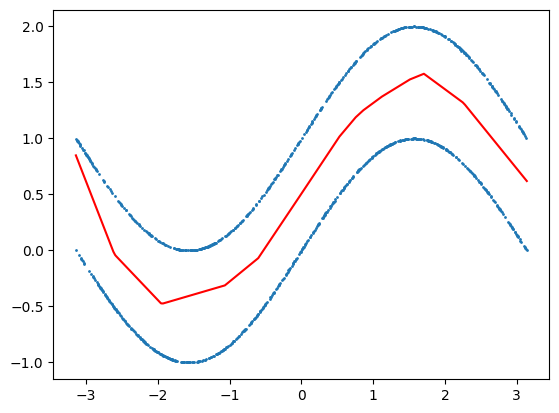

In [ ]:
dom = np.linspace(-np.pi, np.pi, 1000)
dom = torch.tensor(dom, dtype=torch.float32, device=device).reshape(-1, 1)
y_hats = fhat(dom)

dom = dom.detach().cpu().numpy().reshape(-1)
y_hats = y_hats.detach().cpu().numpy().reshape(-1)

plt.plot(dom, y_hats, color="red")
plt.scatter(x_train, y_train, s=1)
plt.show()
ys = f(dom)

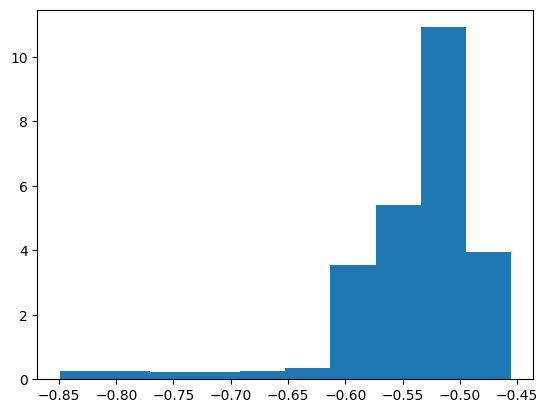

In [ ]:
residual = ys - y_hats
z = np.linspace(-0.25, .25, 100)
plt.hist(residual, density=True)
plt.show()

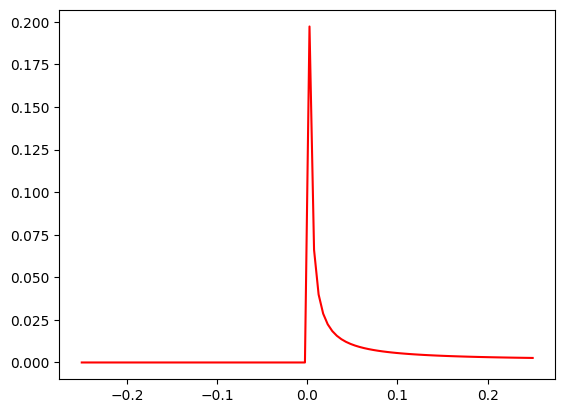

In [ ]:
plt.plot(z, stats.beta.pdf(z, 0.001, 0.001), color="red")

Beta 0.5, 0.5

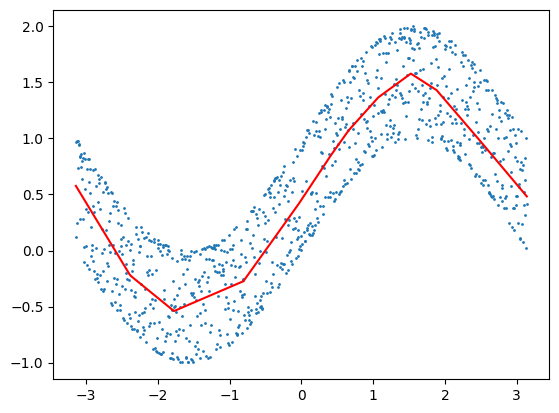

In [ ]:
dom = np.linspace(-np.pi, np.pi, 1000)
dom = torch.tensor(dom, dtype=torch.float32, device=device).reshape(-1, 1)
y_hats = fhat(dom)

dom = dom.detach().cpu().numpy().reshape(-1)
y_hats = y_hats.detach().cpu().numpy().reshape(-1)

plt.plot(dom, y_hats, color="red")
plt.scatter(x_train, y_train, s=1)
plt.show()
ys = f(dom)

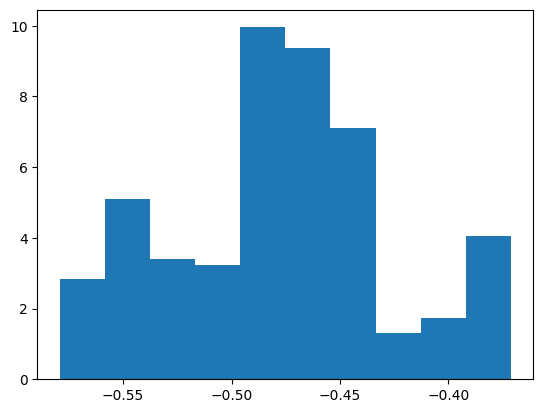

In [ ]:
residual = ys - y_hats
z = np.linspace(-0.25, .25, 100)
plt.hist(residual, density=True)
plt.show()

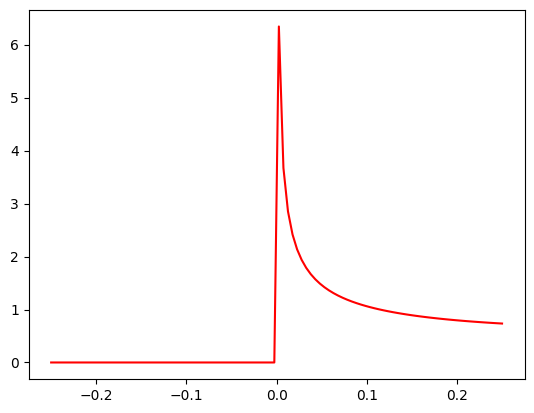

In [ ]:
plt.plot(z, stats.beta.pdf(z, 0.5, 0.5), color="red")

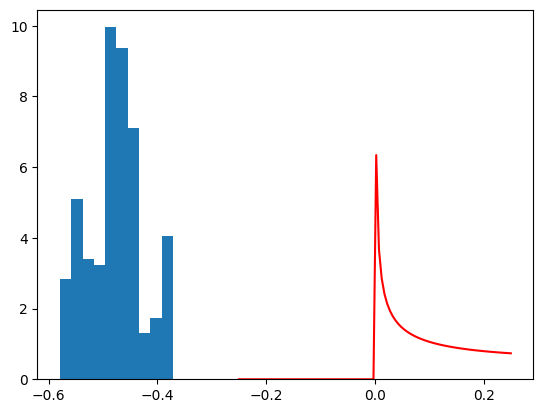

In [ ]:
residual = ys - y_hats
z = np.linspace(-0.25, .25, 100)
plt.hist(residual, density=True)
plt.plot(z, stats.beta.pdf(z, 0.5, 0.5), color="red")
plt.show()

# Double descent

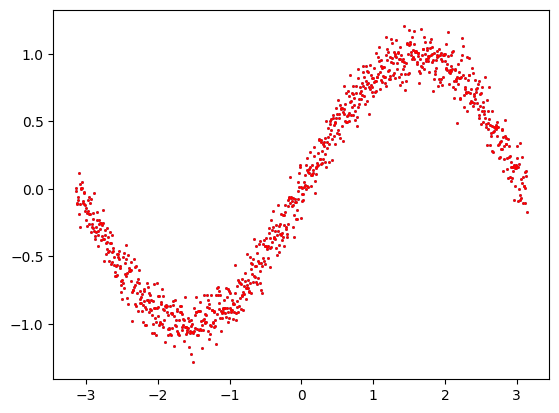

In [ ]:
f = np.sin
x = np.linspace(- np.pi, np.pi, 1000)
eps = np.random.normal(0, 0.1, 1000)
y = f(x) + eps

plt.scatter(x, y, s=1)
plt.scatter(x, y, s =1, color = "red")

# 2 layer

In [ ]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.backends.cudnn.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print("Using device:", device)

Using device: cuda


In [ ]:
x_train = x
y_train = y
# Create Data Set
x = torch.tensor(x_train, dtype=torch.float32, device=device).reshape(-1, 1)
y = torch.tensor(y_train, dtype=torch.float32, device=device).reshape(-1, 1)

# Create Data Loader
batch_size = 10
data = torch.utils.data.TensorDataset(x, y)
loader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True)
# Train Model
class NNModel(Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NNModel, self).__init__()
        self.linear1 = Linear(input_size, hidden_size)
        self.relu = ReLU()
        self.linear2 = Linear(hidden_size, output_size)
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        return out

In [ ]:
network_width = [1,2,3,4,5,10,15,20,30,40,50]
loss_width = []
iter = 5
test = []

for width in network_width:
  loss_mean = 0
  for i in range(iter):
    fhat = NNModel(1, width, 1).to(device)

    # Initialize weights to be close to 0
    for param in fhat.parameters():
        param.data.normal_(0, 0.01)
    # Training Loop
    optimizer = SGD(fhat.parameters(), lr=0.01)
    regularization = 0
    criterion = MSELoss()
    epochs = 101

    for epoch in range(epochs):
        for x, y in loader:
            optimizer.zero_grad()
            yhat = fhat(x)
            loss = criterion(yhat, y) + regularization * (torch.sum(fhat.linear1.weight ** 2) + torch.sum(fhat.linear2.weight ** 2))
            loss.backward()
            optimizer.step()
        if epoch % 100 == 0:
            print("Epoch: %d, Loss: %f" % (epoch, loss.item()))
    
    #Append loss reached at epoch 100
    loss_mean += loss.item()/iter
    test.append(loss.item())
    if i == iter - 1:
      loss_width.append(loss_mean)
    print("***")

In [ ]:
loss_width

[0.13177645206451416,
 0.22057472467422484,
 0.09766963627189398,
 0.11640787869691849,
 0.08957411646842957,
 0.05550573822110891,
 0.021304592676460742,
 0.02131126970052719,
 0.012477160897105932,
 0.01892333533614874,
 0.014084026962518693]

Text(0, 0.5, 'Average test error')

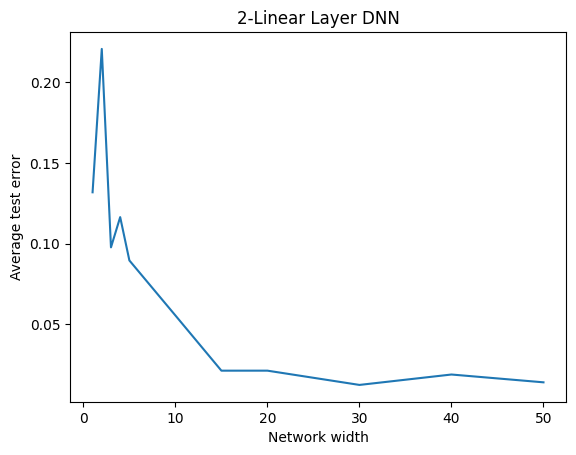

In [ ]:
plt.plot(network_width, loss_width)
plt.xlabel("Network width")
plt.title("2-Linear Layer DNN")
plt.ylabel("Average test error")

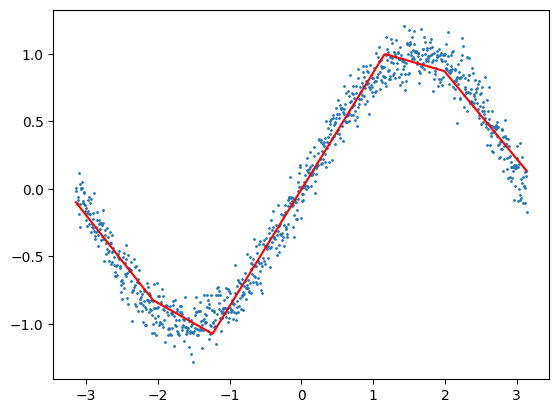

In [ ]:
dom = np.linspace(-np.pi, np.pi, 1000)
dom = torch.tensor(dom, dtype=torch.float32, device=device).reshape(-1, 1)
y_hats = fhat(dom)

dom = dom.detach().cpu().numpy().reshape(-1)
y_hats = y_hats.detach().cpu().numpy().reshape(-1)

plt.plot(dom, y_hats, color="red")
plt.scatter(x_train, y_train, s=1)
plt.show()

In [ ]:
fhat

NNModel(
  (linear1): Linear(in_features=1, out_features=50, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=50, out_features=1, bias=True)
)